In [ ]:
This assignment will help you to consolidate the concepts learnt in the session.

2.Problem Statement
This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.

3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1.A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.
Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
Problem 2:
Which factors are important
Problem 3:
Which algorithms are best for this dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
name=['age','workclass','fnlwgt','education','edu-num','marital','occupation','relationship','race','sex','capital_gain','capital_loss','hours_week','country','classifier']

In [3]:
df1=pd.read_csv('D:/adult.csv',names=name)

In [4]:
df1.head()

,age,workclass,fnlwgt,education,edu-num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,country,classifier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df2=pd.read_csv('D:/adult_test.csv',names=name,skiprows=1)

In [7]:
df2.head()

,age,workclass,fnlwgt,education,edu-num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,country,classifier
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
df=pd.concat([df1,df2],axis=0)

In [18]:
df.head()

,age,workclass,fnlwgt,education,edu-num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,country,classifier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

In [21]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [22]:
df.fnlwgt.unique()

array([ 77516,  83311, 215646, ..., 173449,  89686, 350977], dtype=int64)

In [23]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [25]:
df.marital.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [26]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [28]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [29]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [30]:
df.capital_gain.unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060,  1264,  7262,  1731,  6612], dtype=int64)

In [31]:
df.capital_loss.unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411, 1429, 3175, 1510, 1870, 1911, 2465, 1421],
      dtype=int64)

In [32]:
df.hours_week.unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69], dtype=int64)

In [33]:
df.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [34]:
df.classifier.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_week', 'country', 'classifier'],
      dtype='object')

In [9]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [6]:
df.workclass=df.workclass.replace({' Without-pay':' Never-worked'})

In [7]:
df.workclass=df.workclass.replace({' ?':'others'})

In [22]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'others', ' Self-emp-inc', ' Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

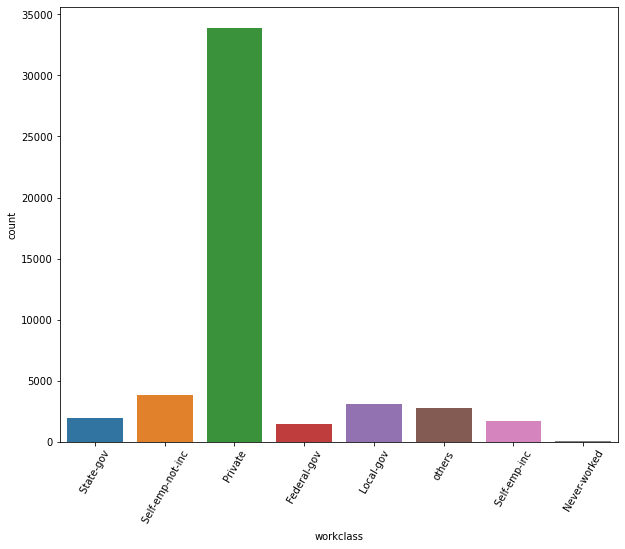

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [23]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [83]:
df.classifier.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [8]:
df.classifier=df.classifier.replace({' <=50K':0,' <=50K.':0}   )  

In [11]:
df.classifier=df.classifier.replace({' >50K':1,' >50K.':1}   )  

In [12]:
df.classifier.unique()

array([0, 1], dtype=int64)

In [13]:
for i in df.education:
    if i==' 11th':
        df.education=df.education.replace({i:'high_school'})
    if i==' 12th':
        df.education=df.education.replace({i:'high_school'})
    if i in [' 5th-6th' ,' 10th' , ' 1st-4th',' 7th-8th' ,' 9th']:
        df.education=df.education.replace({i:' Preschool'})
        

In [14]:
df.education.unique()

array([' Bachelors', ' HS-grad', 'high_school', ' Masters', ' Preschool',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate',
       ' Prof-school'], dtype=object)

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_week', 'country', 'classifier'],
      dtype='object')

In [17]:
df.marital.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [18]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [20]:
df.occupation=df.occupation.replace({' ?':'others'})

In [21]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'others', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
df.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
df.country = df.country.str.lstrip()

In [27]:
df.country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [32]:
def native(country):
    if country in ['United-States','Canada']:
        return 'North_America'
    elif country in ['Puerto-Rico','El-Salvador','Cuba','Jamaica','Dominican-Republic','Guatemala','Haiti','Nicaragua','Trinadad&Tobago','Honduras']:
        return 'Central_America' 
    elif country in ['Mexico','Columbia','Vietnam','Peru','Ecuador','South','Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in ['Germany','England','Italy','Poland','Portugal','Greece','Yugoslavia','France','Ireland','Scotland','Hungary','Holand-Netherlands']:
        return 'EU'
    elif country in ['India','Iran','China','Japan','Thailand','Hong','Cambodia','Laos','Philippines','Taiwan']:
        return 'Asian'
    else:
        return country

In [33]:
df['country'] = df['country'].apply(native)

In [34]:
df.country.unique()

array(['North_America', 'Central_America', 'Asian', '?', 'South_America',
       'EU'], dtype=object)

In [37]:
df.country=df.country.replace({'?':'others'})

In [38]:
df.country.unique()

array(['North_America', 'Central_America', 'Asian', 'others',
       'South_America', 'EU'], dtype=object)

In [39]:
df.head()

,age,workclass,fnlwgt,education,edu-num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,country,classifier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North_America,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,0
3,53,Private,234721,high_school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central_America,0


In [81]:
X=df.drop('classifier',axis=1)
y=df['classifier']

In [89]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: classifier, Length: 48842, dtype: int64

In [82]:
X_new=pd.get_dummies(X)

In [83]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,random_state=101,test_size=0.3)

In [91]:
x_train.shape

(34189, 65)

In [92]:
y_train.shape

(34189,)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression()

In [93]:
lr.fit(x_train,y_train)

LogisticRegression()

In [94]:
lr.score(X_new,y)

0.798206461651857

In [95]:
lr.score(x_train,y_train)

0.7984439439585832

In [96]:
lr.score(x_test,y_test)

0.7976523578789326

In [97]:
penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

In [99]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(lr,param_grid=hyperparameters,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             verbose=3)

In [100]:

gsv.best_params_

{'C': 1.0, 'penalty': 'l2', 'random_state': 0}

In [101]:
lr_tuned = LogisticRegression(C=1.0,penalty='l2',random_state=0)

In [102]:
lr_tuned.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [105]:
lr_tuned.score(x_train,y_train)

0.7984439439585832

In [106]:
Log=lr_tuned.score(x_test,y_test)

In [109]:
lr_pred=lr_tuned.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc
print(f"Accuracy_Score:{accuracy_score(y_test,lr_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,lr_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,lr_pred)}")

Accuracy_Score:0.7976523578789326
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11100
           1       0.73      0.27      0.39      3553

    accuracy                           0.80     14653
   macro avg       0.76      0.62      0.63     14653
weighted avg       0.79      0.80      0.76     14653

**************************************************
Confusion_Matrix:[[10741   359]
 [ 2606   947]]


In [111]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [113]:
gsv = GridSearchCV(dtc,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1228 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 1932 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 2764 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3724 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4812 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6028 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 7372 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 8844 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 10444 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 12172 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 12960 out of 129

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [114]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'splitter': 'best'}

In [115]:
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=3,min_samples_split=8,splitter='best')

In [116]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=8)

In [117]:
Dtc = dtc_tuned.score(x_test,y_test)

In [118]:
dtc_y_pred = dtc_tuned.predict(x_test)

In [119]:
print(f"Accuracy_Score:{accuracy_score(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,dtc_y_pred)}")

Accuracy_Score:0.8571623558315703
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11100
           1       0.77      0.59      0.67      3553

    accuracy                           0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653

**************************************************
Confusion_Matrix:[[10464   636]
 [ 1457  2096]]


In [120]:
Dtc

0.8571623558315703

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [123]:

grid_params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [124]:
gsv = GridSearchCV(rfc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 2036 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3860 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4596 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5396 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6260 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 7188 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]},
             verbose=3)

In [126]:
gsv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'n_estimators': 30}

In [127]:
rfc_tuned = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=5,min_samples_split=9,n_estimators=30)

In [128]:
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=9,
                       n_estimators=30)

In [129]:
RFC = rfc_tuned.score(x_test,y_test)

In [131]:
RFC

0.8514297413498942

In [134]:
rfc_tuned.score(x_train,y_train)

0.8598672087513528

In [132]:
rfc_y_pred = rfc_tuned.predict(x_test)

In [133]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8514297413498942
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.86      0.95      0.91     11100
           1       0.79      0.53      0.64      3553

    accuracy                           0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.85      0.85      0.84     14653

**************************************************
Confusion_Matrix:[[10581   519]
 [ 1658  1895]]


In [135]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)


KNeighborsClassifier()

In [136]:

param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [137]:
gsv = GridSearchCV(knc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.762, total=   1.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.759, total=   1.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.765, total=   1.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.759, total=   2.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.763, total=   2.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.783, total=   2.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.786, total=   1.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.785, total=   1.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.782, total= 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  9.4min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30],
                         'n_neighbors': [3, 7, 9, 11]},
             verbose=3)

In [138]:
gsv.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [139]:

knc_tuned = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=11)
knc_tuned.fit(x_train,y_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, n_neighbors=11)

In [140]:
KNN = knc_tuned.score(x_test,y_test)

In [141]:
knc_y_pred = knc_tuned.predict(x_test)

In [142]:
print(f"Accuracy_Score:{accuracy_score(y_test,knc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,knc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,knc_y_pred)}")

Accuracy_Score:0.7909643076503106
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.80      0.96      0.87     11100
           1       0.69      0.25      0.37      3553

    accuracy                           0.79     14653
   macro avg       0.74      0.61      0.62     14653
weighted avg       0.77      0.79      0.75     14653

**************************************************
Confusion_Matrix:[[10695   405]
 [ 2658   895]]


In [172]:
from xgboost import XGBClassifier
xbc = XGBClassifier()


In [173]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'n_estimators':[10,50,100,200,300] ,
'max_depth': [3,5,7,9,11,15],
}

In [174]:
Gcv = GridSearchCV(xbc,param_grid,scoring='accuracy',cv=5,n_jobs=3,verbose=3)

In [175]:
Gcv.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   19.5s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  9.3min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed: 17.3min
[Parallel(n_jobs=3)]: Done 750 out of 750 | elapsed: 27.1min finished
C:\Users\vindh\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [177]:
Gcv.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}

In [178]:
xbc_tuned = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=200)
xbc_tuned.fit(x_train,y_train)

[12:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
XBc = xbc_tuned.score(x_test,y_test)
print(XBc)

0.8630314611342387


In [180]:
xbc_y_pred = xbc_tuned.predict(x_test)

In [181]:

print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8514297413498942
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.86      0.95      0.91     11100
           1       0.79      0.53      0.64      3553

    accuracy                           0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.85      0.85      0.84     14653

**************************************************
Confusion_Matrix:[[10581   519]
 [ 1658  1895]]


In [182]:
df = {'Models':['Logistic_Reg','Decision Tree','Random Forest','KNN','XGBoost_Classifier'],'Model_Scores':[Log,Dtc,RFC,KNN,XBc]}
pd.DataFrame(df)

,Models,Model_Scores
0,Logistic_Reg,0.797652
1,Decision Tree,0.857162
2,Random Forest,0.851430
3,KNN,0.790964
4,XGBoost_Classifier,0.863031
